#Calculation of Waveguide losses

This is a calculation of waveguide losses per meter. It is based on the formula given in Pozar's book and gives the correct result for the example therein, as well. 

In [81]:
from scipy.constants import c, epsilon_0, mu_0
from scipy.special import jn_zeros, jnp_zeros
from numpy import pi, sqrt, array, zeros, log10, linspace


class TE(object):
    def __init__(self, n,m, f = 188e9, R = 2.3e-3, epsilon=1, mu=1):
        self.n = n
        self.m = m
        self.f = f
        self.R = R
        self.epsilon = epsilon
        self.mu = mu
        
        
        self.pnmprime = self.getPnmprime(self.n, self.m)
        
        self.omega = 2*pi*self.f
        
        self.k = self.omega*sqrt(epsilon_0*epsilon*mu_0*mu)
        self.kc = self.pnmprime/self.R
        self.beta = sqrt(self.k**2 - self.kc**2)
        self.lambdac = 2*pi/self.kc
        self.lambdag = 2*pi/self.beta
        self.vp = self.omega/self.beta
        self.eta = sqrt(self.mu*mu_0/(self.epsilon*epsilon_0))
        
        
        print "pnmprimeVa is: ", self.pnmprime
        
    def getPnmprime(self, n,m):
        allZeros = jnp_zeros(n,m)
        return allZeros[-1]
    
    def lossPerMeter(self, sigma):
        Rs = sqrt(self.omega*self.mu*mu_0/(2*sigma))
        alpha = Rs/(self.R*self.k*self.eta*self.beta)*(self.kc**2 + self.k**2/(self.pnmprime**2 -1))
        return alpha*8.686
        

        
#conductor losses (Pozar Appendix F)
sigmaGold = 4.098e7
sigmaStainless = 1.1e6

TE11 = TE(1,1, R = 0.6e-3)
print "Loss per Meter", TE11.lossPerMeter(sigmaStainless)


#book test
TE11book = TE(1,1, f = 14e9, R = 5e-3, epsilon = 2.08)
print "TE11 loss per Meter gold: ", TE11book.lossPerMeter(sigmaGold) 

#we operate in G band


#Pozar
#Table 3.4
p01 = 2.405

#Table 3.3
p11prime = 1.841

#radius
a = 0.6e-3

#dielectric
epsilon = 1 

pnmprime = array([[3.832, 7.016, 10.174], [1.841, 5.331, 8.536], [3.054, 6.706, 9.970]])


cutoffTE = zeros((10,10))
cutoffTM = zeros((10,10))

for n in range(10):
    zerosTE = jnp_zeros(n, 10)
    
    cutoffTE[n] = zerosTE*c/(2*pi*a*sqrt(epsilon))/1e9
    cutoffTM[n] = jn_zeros(n,10)*c/(2*pi*a*sqrt(epsilon))/1e9

#print cutoffTM

print "TE Modes: 01, 02, 11, 12, 13, 21, 22, 31, 32, 41, 42, 51, 61, 71"
print "TM Modes: 01, 02, 03, 11, 12, 21, 22, 31, 41, 51"
#print cutoffTE[8,0]

#epsilon = 2.08 #ptfe

te11_fc = pnmprime[1,1-1]*c/(2*pi*a*sqrt(epsilon))
tm01_fc = p01*c/(2*pi*a*sqrt(epsilon))
print "Cutoff TE_11: ", te11_fc/1e9 #38.2 GHz
print "Cutoff TM_01: ", tm01_fc/1e9



Rs = ((2*pi*188*4e-7*pi)/2*sigmaGold)

#we can use Pozar p. 126 to estimate the loss due to the stainless. Since t
#Rs scales as 1/sqrt(sigma) 40 times better conductivity will hence be 6 times smaller Rs and 6 times less losses.

#Furthermore alpha is proportional to 1/r, i.e. doubling the radius should give half the losses. 

pnmprimeVa is:  1.84118378134
Loss per Meter 51.5767161809
pnmprimeVa is:  1.84118378134
TE11 loss per Meter gold:  0.582724902002
TE Modes: 01, 02, 11, 12, 13, 21, 22, 31, 32, 41, 42, 51, 61, 71
TM Modes: 01, 02, 03, 11, 12, 21, 22, 31, 41, 51
Cutoff TE_11:  146.400773969
Cutoff TM_01:  191.251418466


#Measurement of Waveguide losses

Source: VCOM-05/188/50-DD (bandwidth not specified on label)<br>
Serial-No.: A-1308/22

Phone Ian: +44 [0] 131 452 8777

The frequency was set to 188 GHz and the output power was set to 50 mW and measured with the ELVA power meter. 

Direct connection resulted in a measured power of 47.77 mW.
Connection via two tapers resulted in 46.90 mW.

Different length of stainless steel tube where installed between tapers, giving the following power vs length:

| Length | Power with two tapers | Comment |
|------------------------------------------|
| 22     | 27.97                 |         |
| 47     | 18.70                 |         |
| 83.5   | 9.2                   |         |
| 153    | 2.97                  | this is our waveguide        |


Attenuation per m:  7.43462608438
Connector loss:  0.609225933979


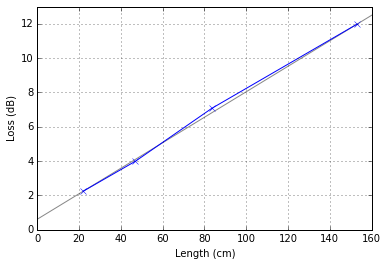

In [63]:
from matplotlib.pyplot import *
%matplotlib inline
l = array([22, 47, 83.5, 153])
p = array([27.97, 18.70, 9.2, 2.97])
p0 = 46.90

attenuation = -10*log10(p/p0)

xDemo = linspace(0,160)
plot(xDemo, 0.609+xDemo/100.*7.434, "-", color="#888888")
plot(l, attenuation, "-x")
xlabel("Length (cm)")
ylabel("Loss (dB)")
xlim([0, 160])
ylim([0, 13])
grid()

print "Attenuation per m: ", (attenuation[-1] - attenuation[0])/((l[-1] - l[0])/100.)
print "Connector loss: ", attenuation[-1] - 7.4346*1.53